In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
games = pd.read_csv('vgsales.csv', sep=',')
p = sns.load_dataset("penguins")

* I do not think there is a correlation between the columns.

In [2]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [3]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [4]:
check_cat_vs_cat_correlation(p, 'species','sex')

The odds of a correlation between species and sex is 2.4010631023415385% (Based on a p value of 0.9759893689765846).
This percentage needs to be at least 95% for a significant correlation.


In [5]:
penguinsContingencyTable = create_contingency_table(p, 'species','sex')

<AxesSubplot:xlabel='sex'>

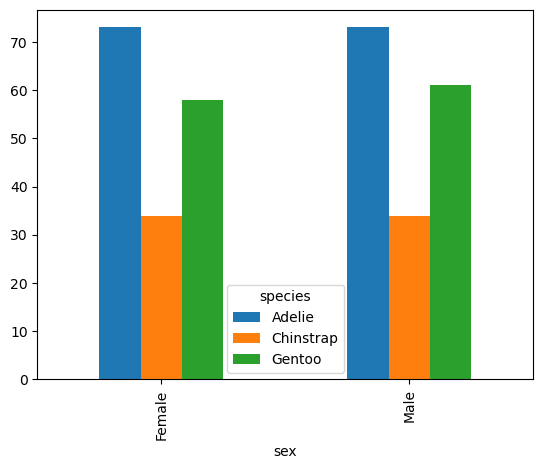

In [6]:
penguinsContingencyTable.plot(kind='bar')

In [7]:
check_cat_vs_cat_correlation(p, 'sex','island')

The odds of a correlation between sex and island is 2.8388770718934975% (Based on a p value of 0.971611229281065).
This percentage needs to be at least 95% for a significant correlation.


In [8]:
penguinsContingencyTable = create_contingency_table(p, 'sex','island')

<AxesSubplot:xlabel='island'>

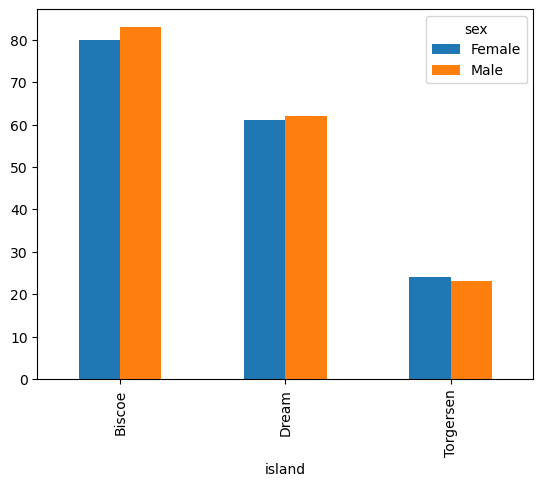

In [9]:
penguinsContingencyTable.plot(kind='bar')

conclusion: Based on a p-value, there is no significant correlation between sex and island. Therefore, it can be concluded that there is no association between these two columns. This was expected since sex and island/species are not expected to have a strong relationship.